### Predictive Heart Disease Model

In [359]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns
from sklearn import metrics 

We will first read the heart rate data from the CSV file using pandas, and sort the rows into two groups that contain individuals who are predicted to have heart disease (`positive_df`), and individuals who are not predicted to have heart disease(`negative_df`).

Assumptions:
 - males are 0, females are 1
 - no exercised induced angina is 0, induced is 1
 - fasted blood sugar greater than 120 is 1, less than is 0


In [207]:
logreg = LogisticRegression(C=1e5)
df = pd.read_csv("/content/drive/MyDrive/College/Freshmen/Club Apps/ECP Tech Challenge/heart_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [186]:
positive_df = df[df["target"] == 1]
positive_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


In [187]:
negative_df = df[df["target"] == 0]
negative_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Analysis Outline:

We will now conduct a preliminary, pairwise analysis on the relationship between each of the independent variables and the dependent categorical variable, which is the `target` classifier.

When analyzing independent variables that are continuous, we'll use a boxplot to visualize the sample distributions of data points that are at risk and not at risk in order to gain a surface level assement of the correlation between the independent variable and the dependent `target` variable.

When analyzing independent variables that are categorical, we'll use a pie chart for each category to visualize the proportion of the data that is predicted to have heart diseas and the proportion that is not. Thus we can again gain a surface level assement of the correlation between the independent variable and the dependent `target` variable.

In order to conduct a more quantitative analysis between the independent and dependent variables, we will use two measures on each pairing of independent and dependent variables. Those two measures are the accuracies of a logistic regression model and decision tree model. We will use 60% of the data from the independent and dependent variables to train both of the models. The remaining 40% of the data will be used as a test set to compute the accuracies of both of the trained models. Since the dependent variable is categorical in whether the patient has heart dieseas(HD) or not—both decision trees and logistic regression models are applicable. 

This training process will (a) help us find which variables should be included in a final multinomial regression and (b) help us determine which model is best suited to be used for a multinomial regression between all independent variables and the dependent variable. Since the dependent variable can only be a 0 or a 1, random guesses would result in an accuracy of 50%. We'll set our threshold to 60%—any dependent variable that produces an accuracy of less than 60% will be deemed to have an insignifigant correlation with the independent variable. 

Finally, we will conduct a multinomial regresison between all the correlating independent variables and the dependent variables to produce a model with the highest accuracy. We will then train this model with 60% of the data and use the other 40% of the data to test it. We can also construct a confusion matrix to better visualize the accuracy of our model. 




The code below is a generalized function that will use both a decision tree and logistic regression to model the data, and will compute and display the respective accuracies. 

In [433]:
def runReg(key):
  ratio = 0.4
  x_train, x_test, y_train, y_test = train_test_split(df[key], df["target"], test_size = ratio, random_state=0)
  x_train = x_train.tolist()
  x_test = x_test.tolist()

  x_train = np.reshape(x_train, (-1, 1))
  x_test= np.reshape(x_test, (-1, 1))

  logreg.fit(x_train, y_train)

  print ('Logistic Regression Accuracy: ' + str(logreg.score(x_test, y_test)*100) + '%')

  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(x_train, y_train)

  print ('Decision Tree Accuracy: ' + str(clf.score(x_test, y_test)*100) + '%')

<!-- spacer -->

Pairwaise visualization of `age` and `target` data:

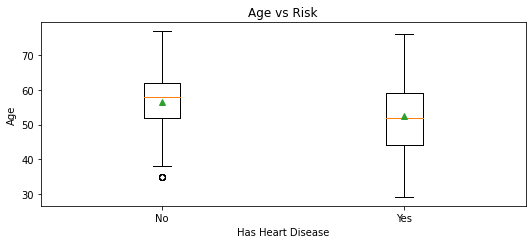

Logistic Regression Accuracy: 63.90243902439025%
Decision Tree Accuracy: 64.8780487804878%


In [434]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 


from pandas.compat import platform
#basic data visulization
x_labels = ["No", "Yes"]

fig, ax = plt.subplots()
#age
key = df.columns[0]

ax.boxplot([negative_df[key], positive_df[key]], showmeans = True)
ax.set_xticklabels(x_labels)
plt.xlabel("Has Heart Disease")
plt.ylabel(key.capitalize())
plt.title(key.capitalize() + " vs Risk")
plt.show()

runReg(key)

<!-- spacer -->

Pairwaise visualization of `sex` and `target` data:

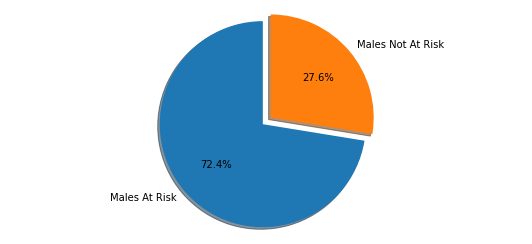

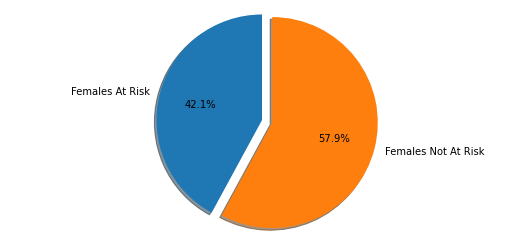

Logistic Regression Accuracy: 60.731707317073166%
Decision Tree Accuracy: 60.731707317073166%


In [435]:
#sex
#assumed males were 0, females were 1
key = df.columns[1]

pos_males = positive_df[positive_df["sex"] == 0]
pos_females = positive_df[positive_df["sex"] == 1]
neg_males = negative_df[negative_df["sex"] == 0]
neg_females = negative_df[negative_df["sex"] == 1]

# print(len(pos_females) / len(pos_females + neg_females))
# print(len(pos_males) / len(neg_males + pos_males))

labels = 'Males At Risk', 'Males Not At Risk'
sizes = [len(pos_males), len(neg_males)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

labels = 'Females At Risk', 'Females Not At Risk'
sizes = [len(pos_females), len(neg_females)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

runReg(key)

<!-- spacer -->

Pairwaise visualization of `cp` and `target` data:

No Pain Values: 497


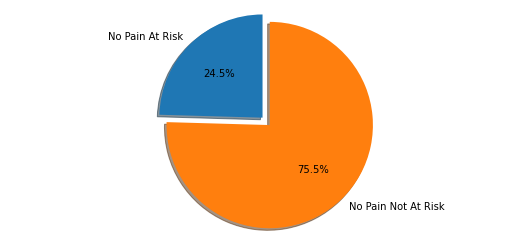

Little Chest Pain Values: 167


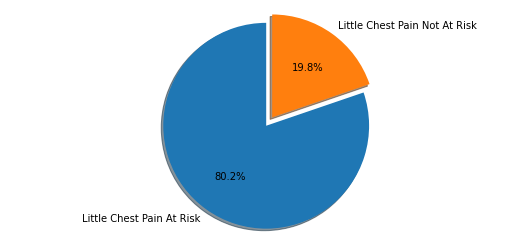

Some Chest Pain Values: 284


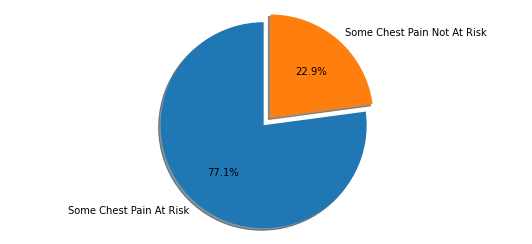

High Chest Pain Values: 77


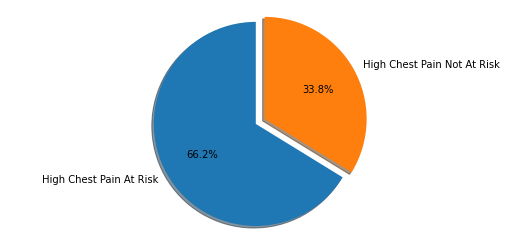

Logistic Regression Accuracy: 77.3170731707317%
Decision Tree Accuracy: 77.3170731707317%


In [436]:
#chest pain

pain_types = ["No Pain", "Little Chest Pain", "Some Chest Pain", "High Chest Pain"]
key = df.columns[2]

for i in range(4):
  level = pain_types[i]
  level_risk = positive_df[positive_df[key] == i]
  level_norisk = negative_df[negative_df[key] == i]
  print(level + " Values: " + str(len(level_risk + level_norisk)))


  labels = level + ' At Risk', level + ' Not At Risk'
  sizes = [len(level_risk), len(level_norisk)]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
          shadow=True, startangle=90)
  ax1.axis('equal')
  plt.show()


runReg(key)

<!-- From the pie charts above that show the proportions of people who are predicted to have risk of HD within different levels of chest pain, we can see that the whethere the `cp` value is non-zero is definitively correlated with the a higehr predicted risk of HD.

We also see that as the level of chets pain increases, the proportion decreases. But when we look at the number of data values for each level of pain, we see that there are only 77 entries for the highest levek of pain as opposed to 284 and 176 for the other two pain levels. We can conclude that the lower proportion for the highets pain level may be deviated from the other two pain levele because of the smaller sample size.

Thus we will assume that all pain levels equally correlate with the likleyhood of having HD, meaning we can treat chest pain as a binary classifier that is 1 if the patient has chest pain and 0 if the patient does not. 

For the building of our model, we will include the binary classifier of chestpain as a dependent variable. -->

Pairwaise visualization of `trestbps` and `target` data:

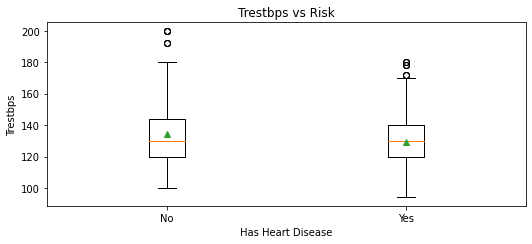

Logistic Regression Accuracy: 54.87804878048781%
Decision Tree Accuracy: 60.731707317073166%


In [437]:
#trestbps

fig, ax = plt.subplots()

#age
key = df.columns[3]

ax.boxplot([negative_df[key], positive_df[key]], showmeans = True)
ax.set_xticklabels(x_labels)
plt.xlabel("Has Heart Disease")
plt.ylabel(key.capitalize())
plt.title(key.capitalize() + " vs Risk")
plt.show()


runReg(key)

Analyzing the box plots above, and looking at the centers and spreads of the dsitribution above

Pairwaise visualization of `chol` and `target` data:

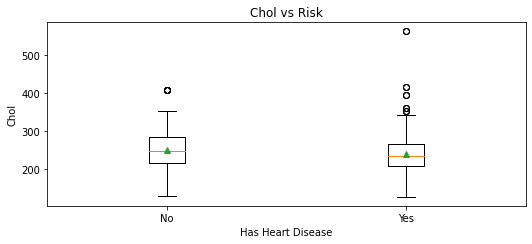

Logistic Regression Accuracy: 57.56097560975609%
Decision Tree Accuracy: 75.85365853658537%


In [438]:
#chol

fig, ax = plt.subplots()

key = df.columns[4]

ax.boxplot([negative_df[key], positive_df[key]], showmeans = True)
ax.set_xticklabels(x_labels)
plt.xlabel("Has Heart Disease")
plt.ylabel(key.capitalize())
plt.title(key.capitalize() + " vs Risk")
plt.show()


runReg(key)

Pairwaise visualization of `fbs` and `target` data:

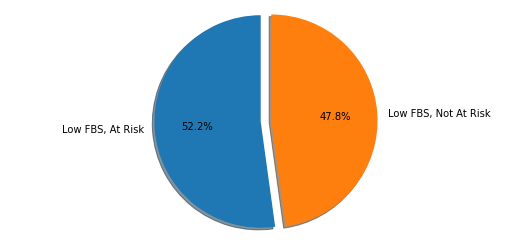

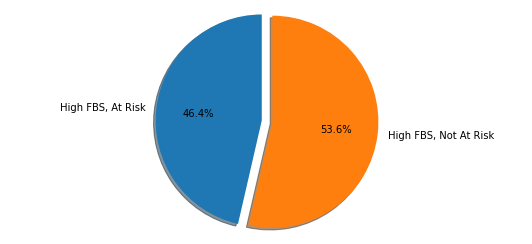

Logistic Regression Accuracy: 54.390243902439025%
Decision Tree Accuracy: 54.390243902439025%


In [439]:
#fasted blood sugar
key = df.columns[5]

low_pos = positive_df[positive_df["fbs"] == 0]
low_neg = negative_df[negative_df["fbs"] == 0]
high_pos = positive_df[positive_df["fbs"] == 1]
high_neg = negative_df[negative_df["fbs"] == 1]


labels = 'Low FBS, At Risk', 'Low FBS, Not At Risk'
sizes = [len(low_pos), len(low_neg)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

labels = 'High FBS, At Risk', 'High FBS, Not At Risk'
sizes = [len(high_pos), len(high_neg)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


runReg(key)

Pairwaise visualization of `ecg` and `target` data:

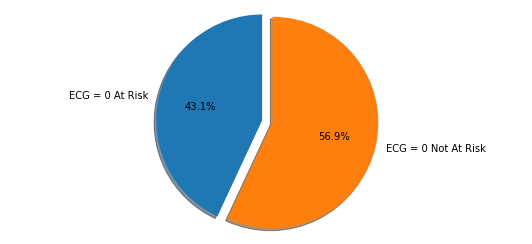

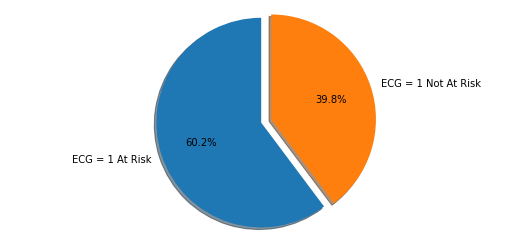

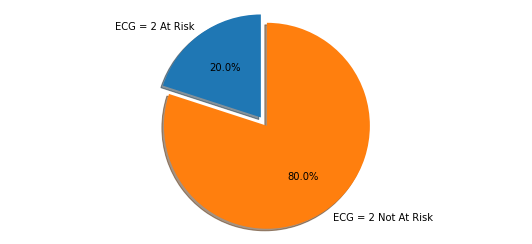

Logistic Regression Accuracy: 57.073170731707314%
Decision Tree Accuracy: 57.3170731707317%


In [440]:
#resting electrocardiographic results 

pain_types = ["ECG = 0", "ECG = 1", "ECG = 2"]
key = df.columns[6]

for i in range(3):

  level = pain_types[i]
  level_risk = positive_df[positive_df[key] == i]
  level_norisk = negative_df[negative_df[key] == i]


  labels = level + ' At Risk', level + ' Not At Risk'
  sizes = [len(level_risk), len(level_norisk)]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
          shadow=True, startangle=90)
  ax1.axis('equal')
  plt.show()


runReg(key)

Pairwaise visualization of `thalach` and `target` data:

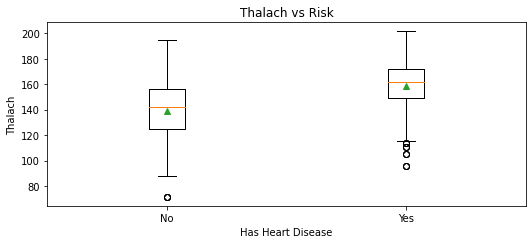

Logistic Regression Accuracy: 74.14634146341463%
Decision Tree Accuracy: 71.21951219512195%


In [441]:
#thalach
key = df.columns[7]
fig, ax = plt.subplots()

ax.boxplot([negative_df[key], positive_df[key]], showmeans = True)
ax.set_xticklabels(x_labels)
plt.xlabel("Has Heart Disease")
plt.ylabel(key.capitalize())
plt.title(key.capitalize() + " vs Risk")
plt.show()


runReg(key)

Pairwaise visualization of `exang` and `target` data:

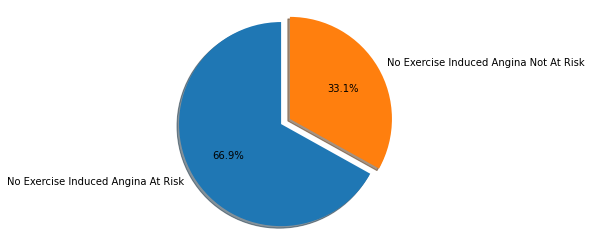

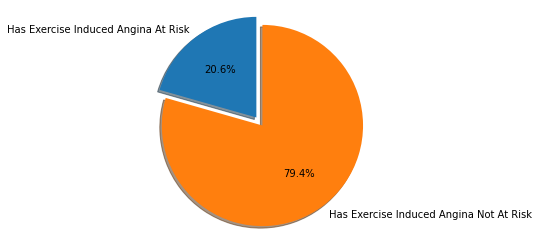

Logistic Regression Accuracy: 73.41463414634146%
Decision Tree Accuracy: 73.41463414634146%


In [442]:
pain_types = ["No Exercise Induced Angina", "Has Exercise Induced Angina"]

key = df.columns[8]

for i in range(2):

  level = pain_types[i]
  level_risk = positive_df[positive_df[key] == i]
  level_norisk = negative_df[negative_df[key] == i]


  labels = level + ' At Risk', level + ' Not At Risk'
  sizes = [len(level_risk), len(level_norisk)]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
          shadow=True, startangle=90)
  ax1.axis('equal')
  plt.show()

runReg(key)

Pairwaise visualization of `oldpeak` and `target` data:

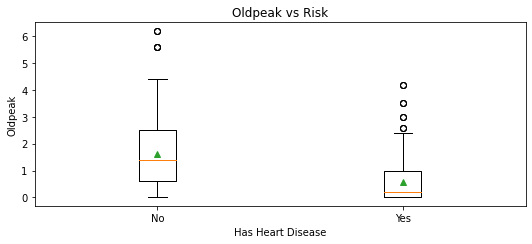

Logistic Regression Accuracy: 75.1219512195122%
Decision Tree Accuracy: 72.6829268292683%


In [443]:
fig, ax = plt.subplots()

#age
key = df.columns[9]

ax.boxplot([negative_df[key], positive_df[key]], showmeans = True)
ax.set_xticklabels(x_labels)
plt.xlabel("Has Heart Disease")
plt.ylabel(key.capitalize())
plt.title(key.capitalize() + " vs Risk")
plt.show()


runReg(key)

Pairwaise visualization of `slope` and `target` data:

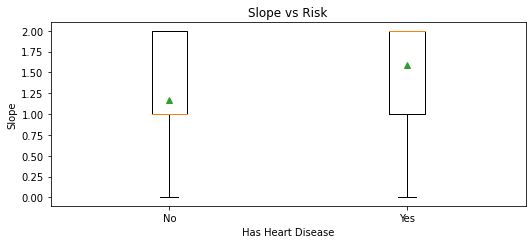

Logistic Regression Accuracy: 70.24390243902438%
Decision Tree Accuracy: 70.24390243902438%


In [444]:
fig, ax = plt.subplots()

#age
key = df.columns[10]

ax.boxplot([negative_df[key], positive_df[key]], showmeans = True)
ax.set_xticklabels(x_labels)
plt.xlabel("Has Heart Disease")
plt.ylabel(key.capitalize())
plt.title(key.capitalize() + " vs Risk")
plt.show()


runReg(key)

Pairwaise visualization of `ca` and `target` data:

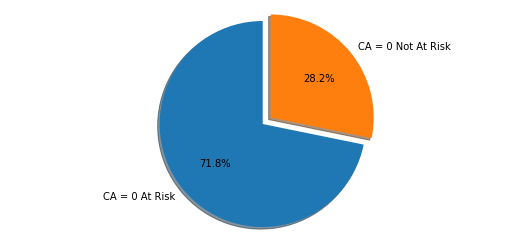

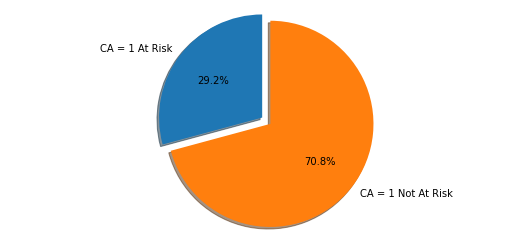

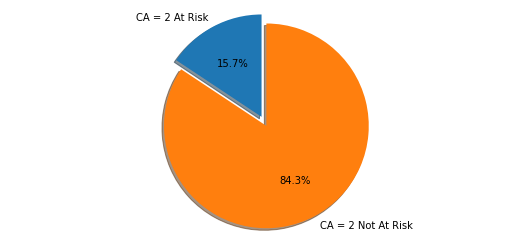

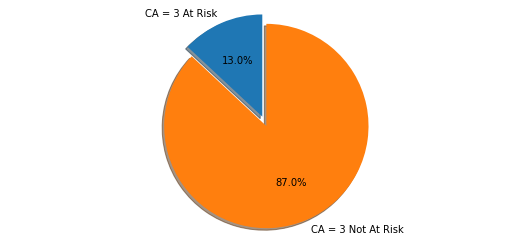

Logistic Regression Accuracy: 72.92682926829268%
Decision Tree Accuracy: 73.90243902439025%


In [397]:
# number of major vessels (0-3) colored by fluoroscopy

pain_types = ["CA = 0", "CA = 1", "CA = 2", "CA = 3"]

key = df.columns[11]

for i in range(4):

  level = pain_types[i]
  level_risk = positive_df[positive_df[key] == i]
  level_norisk = negative_df[negative_df[key] == i]


  labels = level + ' At Risk', level + ' Not At Risk'
  sizes = [len(level_risk), len(level_norisk)]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
          shadow=True, startangle=90)
  ax1.axis('equal')
  plt.show()


runReg(key)

Pairwaise visualization of `thal` and `target` data:

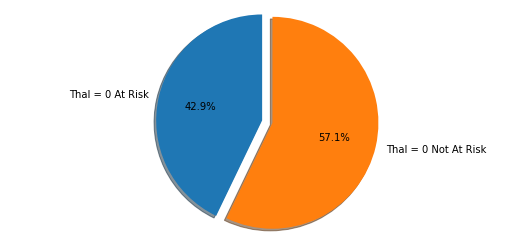

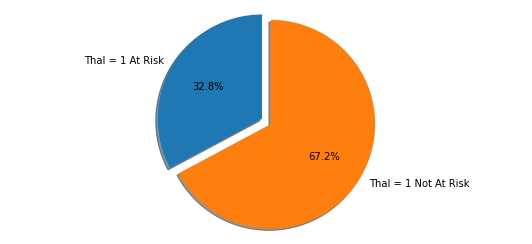

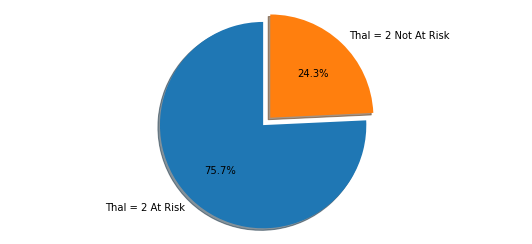

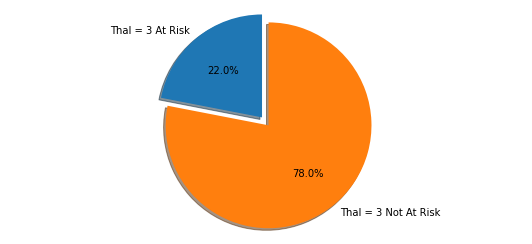

Logistic Regression Accuracy: 75.60975609756098%
Decision Tree Accuracy: 78.53658536585367%


In [445]:
# number of major vessels (0-3) colored by fluoroscopy

pain_types = ["Thal = 0", "Thal = 1", "Thal = 2", "Thal = 3"]

key = df.columns[12]

for i in range(4):

  level = pain_types[i]
  level_risk = positive_df[positive_df[key] == i]
  level_norisk = negative_df[negative_df[key] == i]


  labels = level + ' At Risk', level + ' Not At Risk'
  sizes = [len(level_risk), len(level_norisk)]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode = explode,
          shadow=True, startangle=90)
  ax1.axis('equal')
  plt.show()


runReg(key)

## Pairwise Anlsysis Conclusion:

From the graphs and regression/classification accuracies from above, we can make a couple of conclusions. Firstly, the Decision Tree Classification Model almost always had a higher accuracy than the Logistic Regression Model, so we will likely be using the Decision Tree Classification Model for our multinomial model of all correlating dependent variables. Our second observation is that almost all of the independent variables, when used to train the Decision Tree Model, had an accuracy higher than 60% except for the fasted blood sugar and ECG classifiers. 

Thus we will create two multinomial decision tree models, one that includes all of the dependent variables and one that includes all of them except for the FBS and ECG classifiers. Removing the "counfounding variables" should result in a more accurate model, as shown below. 

In [426]:
def multinomialModel(vars):
  x_train, x_test, y_train, y_test = train_test_split(vars, df["target"], test_size = 0.5)

  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(x_train, y_train)
  print ('Decision Tree Accuracy: ' + str(clf.score(x_test, y_test)*100) + '%')

  y_pred=clf.predict(x_test)
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
  class_names=[0,1,2] 
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

all_vars = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

selected_vars = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

ALL VARS:
Decision Tree Accuracy: 95.51656920077973%


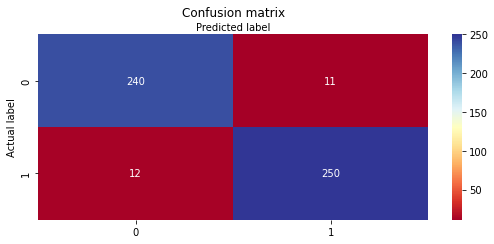

In [446]:
print("ALL VARS:")
multinomialModel(all_vars)


SELECTED VARS
Decision Tree Accuracy: 97.07602339181285%


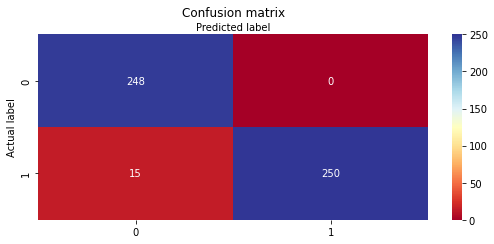

In [453]:
print("\nSELECTED VARS")
multinomialModel(all_vars)

### Final Conclusions:

After constructing both Decision Tree Models, we see that the model that was trained with the selected independent variables from our Pairwaise Analysis resulted in slightly more accurate model. The final accuracy of 97% is extremley high for a machine learning algorithm, but given that the output is a binary classifer which must either be 0 or 1, and that the pairwise models were fairly accurate themselves (~70% accuracy), it makes sense that the multinomial Decision Tree Model has achieved a 97% accuracy when trained with 60% of the data and tested with the other 40%.